In [27]:
import numpy as np
import pandas as pd

In [28]:
df = pd.read_csv('telecomStandardized.csv')
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4553,1,0,1,1,0.098592,1,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4495,1,0,0,0,0.225352,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0
755,1,0,0,0,0.028169,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5893,1,0,1,0,0.112676,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3010,0,0,1,1,0.816901,1,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0


In [29]:
data = df.drop('Churn',axis='columns')
labels = df['Churn']
data.sample(5)
#labels.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3759,1,0,0,0,0.056338,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
617,1,0,0,0,0.788732,1,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0
2231,0,1,0,0,0.056338,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
671,1,0,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4481,1,0,1,1,0.887324,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [34]:
# Step 1: Standardization
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
standardized_data = (data - mean) / std_dev

# Step 2: Compute Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Select Principal Components
k = 26  # Select top k principal components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
selected_indices = sorted_indices[:k]  # Select top k indices
principal_components = eigenvectors[:, selected_indices]

# Step 5: Transform the Data
reduced_data = np.dot(standardized_data, principal_components)

# Now you can use reduced_data for classification

In [35]:
print(reduced_data.shape)

(7032, 26)


In [36]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_data, labels, test_size=0.2, random_state=15)

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

df = pd.read_csv('telecomStandardized.csv')

# Define the SVM class
class SVM:
    def __init__(self, learning_rate=0.0001, lambda_param=0.00001, n_iters=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


# Load data
# Assuming your data is stored in a DataFrame named 'df'
# 'df' should have the churn label column named 'churn' and other features as columns

# Split the data into features and target label
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

# Standardize the features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
X_scaled = X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12)

# Train SVM classifier
svm = SVM()
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.24520255863539445


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

df = pd.read_csv('telecomStandardized.csv')

# Define the SVM class
class SVM:
    def __init__(self, learning_rate=0.0001, lambda_param=0.00001, n_iters=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


# Load data
# Assuming your data is stored in a DataFrame named 'df'
# 'df' should have the churn label column named 'churn' and other features as columns

# Split the data into features and target label
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

# Standardize the features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
X_scaled = X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12)

# Train SVM classifier
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


C:\Users\dilli\AppData\Local\Temp\ipykernel_14008\2246172314.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Accuracy: 0.8038379530916845


In [24]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7981520966595593


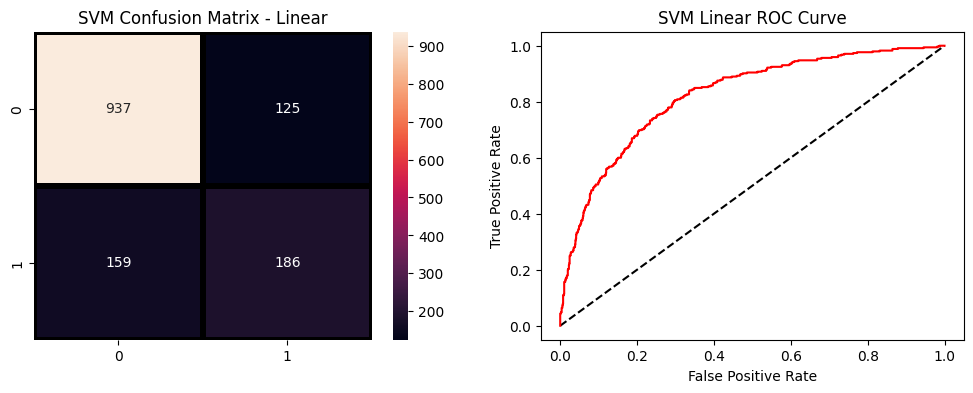

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.svm import SVC

# Assuming 'svm' is the trained SVM model
# and 'X_test', 'y_test' are the test data
y_pred = svm.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("SVM Confusion Matrix - Linear")

# ROC Curve
y_pred_prob = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SVM Linear', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Linear ROC Curve')
plt.show()

In [26]:
svm = SVC(kernel='poly', C=1, degree= 10)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7540867093105899


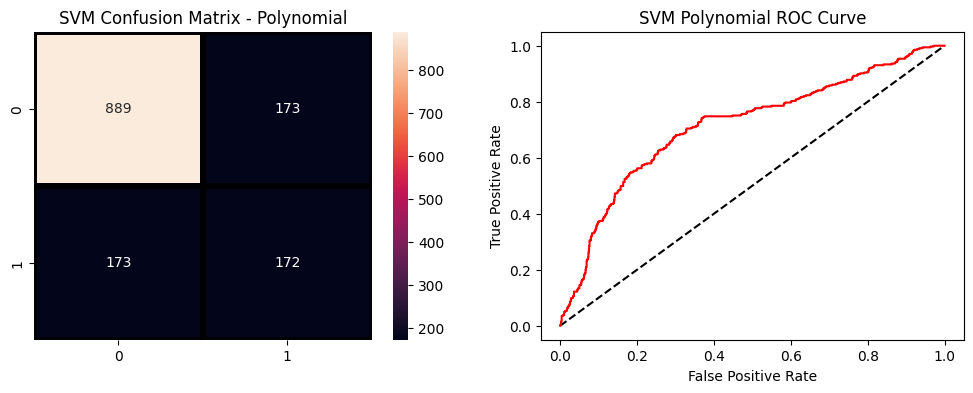

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.svm import SVC

# Assuming 'svm' is the trained SVM model
# and 'X_test', 'y_test' are the test data
y_pred = svm.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("SVM Confusion Matrix - Polynomial")

# ROC Curve
y_pred_prob = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SVM Polynomial', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Polynomial ROC Curve')
plt.show()

In [28]:
svm = SVC(kernel='rbf', gamma=0.01,C=10)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8088130774697939


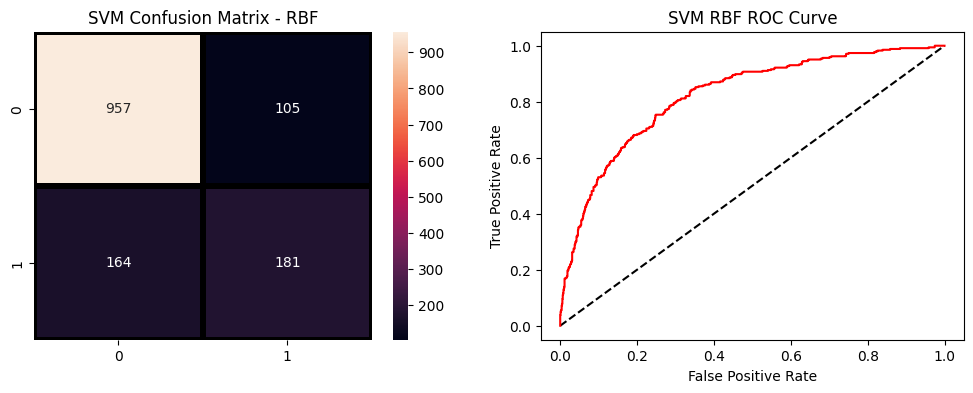

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.svm import SVC

# Assuming 'svm' is the trained SVM model
# and 'X_test', 'y_test' are the test data
y_pred = svm.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("SVM Confusion Matrix - RBF")

# ROC Curve
y_pred_prob = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SVM RBF', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM RBF ROC Curve')
plt.show()